In [55]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd

In [15]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, inspect  

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
inspector= inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [25]:
# Calculate the date 1 year ago from the last data point in the database
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year 

datetime.date(2016, 8, 23)

In [27]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

In [28]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)
#df

In [32]:
#clean up the data and drop any Nans 
df=df.dropna()


In [35]:
# Sort the dataframe by date
df= df.sort_values('date')
#take a lil peek of the sorted data 
df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


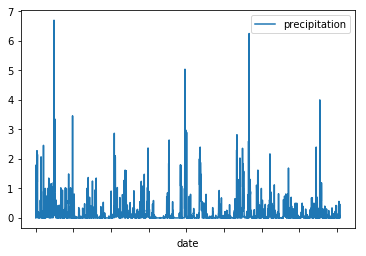

In [34]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [13]:
type(func.count(Station.station))

sqlalchemy.sql.functions.count

In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station,func.count(Measurement.station)\
                               .label('counts'))\
.group_by(Measurement.station)\
.order_by(desc('counts'))\
.all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
#temperature observation data is stored as 'tobs' in our df 
sel = [Measurement.station,
      func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]
min_max=session.query(*sel).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()


In [37]:
min_max

('USC00519281', 54.0, 85.0, 71.66378066378067)

In [48]:
# Choose the station with the highest number of temperature observations.
tobs_max = min_max[0]
#tobs_max
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#filter by the station with the highest number of observations

tobs_12mo= session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station==tobs_max).\
filter(Measurement.date>= prev_year).\
order_by(Measurement.date).all()


In [53]:
#create a data frame with the collected data from the top station
df_top_tobs=pd.DataFrame(tobs_12mo, columns=['date','tobs'])

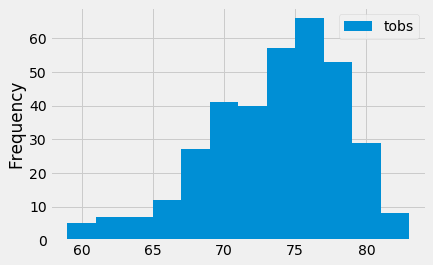

In [57]:
# Filter by the station with the highest number of observations
#plot the results as a histogram with bins=12
df_top_tobs.plot.hist(bins=12)
plt.show()

## Step 2 - Climate App 
[please see app.py for the flask api file] 
